In [409]:
%matplotlib inline 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math

N = 1000



Contrastes o pruebas de Kolmogorov-Smirnov

In [415]:
def ContrasteKolmogorov(x):
    u = [1.0] * N
    x1 = np.cumsum(np.divide(u,N)) #genera un vector de 2 - 20 con incrementos de 4
    y1 = np.cumsum(np.divide(u,N)) #vector de suma acumulada

    x2 = np.sort(x) # Ordena los numeros 
    y2 = np.cumsum(x2/np.max(np.cumsum(x))) #Maximo de suma acumulada de X

    Desviacion=np.absolute(y2-y1) # Desviacion estandar impirica

    print 'Desviacion = ',np.max(Desviacion)
    MAX = 1.73/math.sqrt(N)
    if np.max(Desviacion) < MAX:
        print 'Se rechaza la hipotesis de uniformidad'
    else:
        print 'Se acepta la hipotesis de uniformidad'

    plt.plot(x1,y1,label='Uniform')
   
    plt.plot(x2,y2,label='Random')

    x3 = [x2[Desviacion.argmax()], x2[Desviacion.argmax()]]
    y3 = [np.min([x2[Desviacion.argmax()],y2[Desviacion.argmax()]]), np.max([x2[Desviacion.argmax()],y2[Desviacion.argmax()]])]

    plt.step(x3,y3,label='Desviacion')

    plt.legend()
    plt.xlabel('X',fontsize=14, color='y')
    plt.ylabel('Cumulative Probability P(X)', fontsize=14, color='g') 
    plt.ylim(0, 1.05)
    plt.grid(True)

    plt.show()

χ2

In [416]:
def chicuadrado(k,x):

    count, bins, ignored = plt.hist(x, k, normed=False)# Plot empirical distribution f(x)
    plt.grid(True)
    plt.plot(bins, np.ones_like(bins), linewidth=3, color='y')

    chi = 0
    MAX=124.3
    for fi in count:
        e = N/float(k) # k subconjuntos
        chi += ((fi - e)**2)/e
    if chi > MAX:
        print 'Se rechaza la hipotesis de uniformidad'
    else:
        print 'Se acepta la hipotesis de uniformidad'

    print 'chi:',chi

RACHAS

In [417]:
def Testracha(x):
    v = []
    for i in range(len(x)-1):
        if x[i] > x[i+1]:
            v.append(0)
        elif x[i] < x[i+1]:
            v.append(1)
    
    R = 1 
    for i in range(len(v)-1):
        if v[i]!= v[i+1]: 
            R+=1
    print 'Cantidad de Rachas:',R
    Z = (R - (2*N-1)/float(3))/math.sqrt((16*N-29)/float(90))
    print 'El estadistico de contraste Z seria :',np.absolute(Z)

RANDU

In [418]:
def GeneradorRandu(x, n):
    v = []
    num=65539.0
    d=2147483648.0
    for i in range(n):
        x = (num*x)%(d)
        v.append(float(x)/(d))
    return v

x = GeneradorRandu(43562, N)


Contraste o prueba de Kolmogorov- RANDU

Desviacion =  0.248757371873
Se acepta la hipotesis de uniformidad


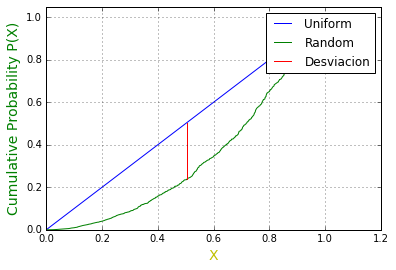

In [419]:
ContrasteKolmogorov(x)

X^2 ---RANDU

Se acepta la hipotesis de uniformidad
chi: 121.908


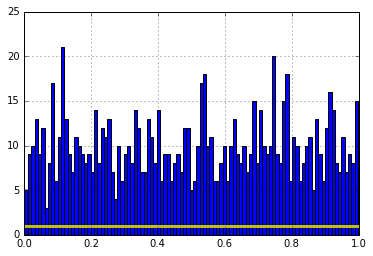

In [420]:
chicuadrado(101,x)

Test de rachas - RANDU

In [421]:
Testracha(x)

Cantidad de Rachas: 663
El estadistico de contraste Z seria : 0.250226870949


Sinclair

In [422]:
def sinclair(x, n):
    v = []
    num=75.0
    d=65536.0
    for i in range(n):
        x = (num*x)%((d)+1)
        v.append(float(x)/((d)+1))
    return v
sinc = sinclair(43562, N)

Contraste o prueba de Kolmogorov - Sinclair

Desviacion =  0.248757371873
Se acepta la hipotesis de uniformidad


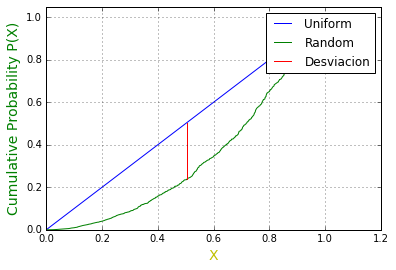

In [423]:
ContrasteKolmogorov(x)

X^2 - Sinclair

Se acepta la hipotesis de uniformidad
chi: 121.908


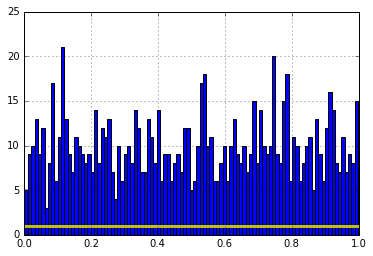

In [424]:
chicuadrado(101,x)

Test de rachas - Sinclair

In [425]:
Testracha(x)

Cantidad de Rachas: 663
El estadistico de contraste Z seria : 0.250226870949


Numerical reciepes  xi+1

In [426]:
def Numericalreciepies(x, n):
    v = []
    mul=1664525.0
    num=1013904223.0
    div=4294967296.0
    for i in range(n):
        x = (mul*x + num)%(div)
        v.append(float(x)/div)
    return v
x = reciepies(43562, N)

Contraste o prueba de Kolmogorov - Numerical Reciepes

Desviacion =  0.248462695296
Se acepta la hipotesis de uniformidad


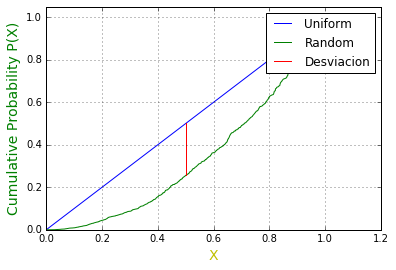

In [427]:
ContrasteKolmogorov(x)

X^2- Numerical Reciepes

Se acepta la hipotesis de uniformidad
chi: 101.304


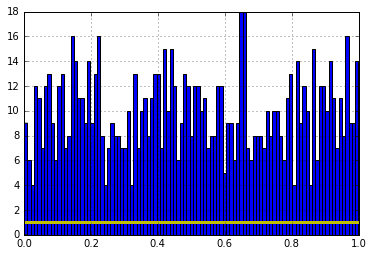

In [428]:
chicuadrado(101,x)

Test de Rachas - Numerical Reciepes

In [429]:
Testracha(x)

Cantidad de Rachas: 646
El estadistico de contraste Z seria : 1.52638391279


Borland C/C++  xi+1

In [430]:
def BorlandCC(x, n):
    v = []
    mul=226955477.0
    div=4294967296.0
    for i in range(n):
        x = ((mul*x)+1)%(div)
        v.append(float(x)/div)
    return v
x = BorlandCC(43567, N)

Contraste o prueba de Kolmogorov- Borland C/C++

Desviacion =  0.267252094437
Se acepta la hipotesis de uniformidad


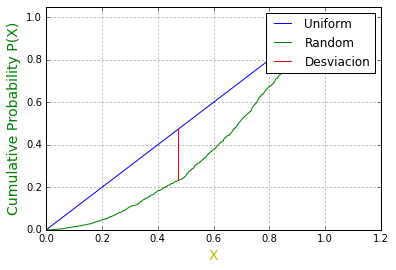

In [431]:
ContrasteKolmogorov(x)

X^2 - Borland C/C++

Se acepta la hipotesis de uniformidad
chi: 111.808


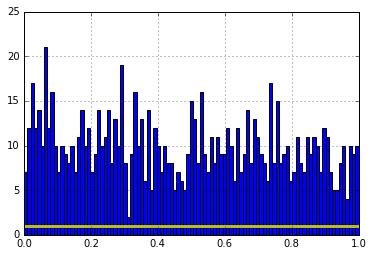

In [432]:
chicuadrado(101,x)

Test de Rachas - Borland C/C++

In [433]:
Testracha(x)

Cantidad de Rachas: 666
El estadistico de contraste Z seria : 0.0250226870949
